In [722]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import cv2

In [723]:
resized_img_height = 128
resized_img_width = 128
K_value = 13

In [724]:
from sklearn.model_selection import train_test_split

def divide_dataset(x, y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
    
    return x_train, x_test, y_train, y_test

In [725]:
from sklearn.preprocessing import MinMaxScaler

def normalise_features(x_train, x_test):
    scaler = MinMaxScaler()
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    print("X_train:",len(x_train),"X_test:",len(x_test),"normalised")
    
    return x_train, x_test

In [726]:
from sklearn.preprocessing import LabelEncoder

def encode_target(y_train, y_test):
    label_encoder = LabelEncoder()

    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    print("Y_train:",len(y_train),"Y_test:",len(y_test),"encoded")
    
    return y_train, y_test, label_encoder

In [727]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_model(x_train, y_train, metric="euclidean"):
    model = KNeighborsClassifier(n_neighbors=K_value,metric= metric)
    model.fit(x_train,y_train) 
    print("KNN Model with",metric,"metric is ready")
    return model

In [728]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def test_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print("Predicted values:",y_pred,sep="\n")
    print("Test values",y_test,sep="\n")
    
    print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")
    
    cm=confusion_matrix(y_pred,y_test)
    print("Confusion Matrix:",cm)
    
    print("Metrics",metrics.classification_report(y_test,y_pred),sep="\n")
    
    

In [729]:
images = []
labels = []
count = 0
for filename in os.listdir('/kaggle/input/vehicle-detection-image-set/data/vehicles'):
    img = cv2.imread(os.path.join('/kaggle/input/vehicle-detection-image-set/data/vehicles',filename), cv2.IMREAD_COLOR)
    if img is not None:
        img = cv2.resize(img, (resized_img_height, resized_img_width))
        images.append(img.flatten())
        labels.append("vehicle")
        count+=1
    if count==50:
        break
        
count = 0        
for filename in os.listdir('/kaggle/input/vehicle-detection-image-set/data/non-vehicles'):
    img = cv2.imread(os.path.join('/kaggle/input/vehicle-detection-image-set/data/non-vehicles',filename), cv2.IMREAD_COLOR)
    if img is not None:
        img = cv2.resize(img, (resized_img_height, resized_img_width))
        images.append(img.flatten())
        labels.append("non-vehicle")
        count+=1
    if count==50:
        break
        
images = np.array(images)

df = pd.DataFrame(images)
df['Target'] = labels

print("Images read:",str(len(images))+"\nDataframe created")

Images read: 100
Dataframe created


In [730]:
print(df)

      0    1    2    3    4    5    6    7    8    9  ...  49143  49144  \
0   132  134  121  151  153  139  188  192  176  206  ...     50     50   
1    43   44   46   43   44   46   42   44   46   41  ...     64     58   
2    45   49   62   48   50   63   55   51   64   55  ...     48     43   
3    83   92   73  109   95   71  162  102   67  192  ...     62     63   
4    22   22   25   22   21   23   22   20   20   22  ...    100    116   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
95    0    0    0    0    0    0    0    0    0    0  ...      2      0   
96  202  187  161  202  187  161  202  187  161  202  ...    124    133   
97   38   42   44   38   42   44   38   42   44   38  ...     57     60   
98   53   58   51   53   58   51   53   58   51   53  ...    117    119   
99   32   44   51   32   44   50   32   43   49   36  ...    197    193   

    49145  49146  49147  49148  49149  49150  49151       Target  
0      39     51     51     39  

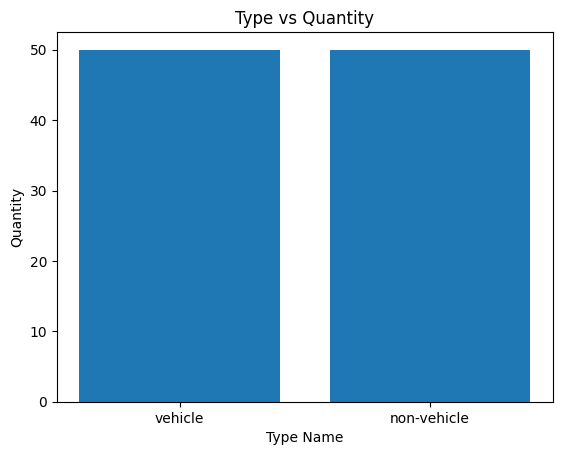

In [731]:
categories = list(set(df['Target'].values))
plt.bar(categories,df['Target'].value_counts())
plt.title('Type vs Quantity')
plt.xlabel('Type Name')
plt.ylabel('Quantity')
plt.show()


In [732]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [733]:
x_train, x_test, y_train, y_test = divide_dataset(x, y)

In [734]:
x_train, x_test = normalise_features(x_train, x_test)
y_train, y_test, _ = encode_target(y_train, y_test)

X_train: 75 X_test: 25 normalised
Y_train: 75 Y_test: 25 encoded


In [735]:
model_E = KNN_model(x_train, y_train, "euclidean")
test_model(model_E, x_test, y_test)

KNN Model with euclidean metric is ready
Predicted values:
[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  64.0 %
Confusion Matrix: [[10  7]
 [ 2  6]]
Metrics
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.75      0.46      0.57        13

    accuracy                           0.64        25
   macro avg       0.67      0.65      0.63        25
weighted avg       0.67      0.64      0.63        25



In [736]:
model_M = KNN_model(x_train, y_train, "manhattan")
test_model(model_M, x_test, y_test)

KNN Model with manhattan metric is ready
Predicted values:
[0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  80.0 %
Confusion Matrix: [[11  4]
 [ 1  9]]
Metrics
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.90      0.69      0.78        13

    accuracy                           0.80        25
   macro avg       0.82      0.80      0.80        25
weighted avg       0.82      0.80      0.80        25



In [737]:
model_M = KNN_model(x_train, y_train, "minkowski")
test_model(model_M, x_test, y_test)

KNN Model with minkowski metric is ready
Predicted values:
[0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  64.0 %
Confusion Matrix: [[10  7]
 [ 2  6]]
Metrics
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.75      0.46      0.57        13

    accuracy                           0.64        25
   macro avg       0.67      0.65      0.63        25
weighted avg       0.67      0.64      0.63        25



In [738]:
from skimage.feature import local_binary_pattern
import numpy as np

# Function to extract LBP features
def extract_lbp_features(image):
    radius_list = [1, 3, 5]  # Test with different radius values
    hist_list = []

    for radius in radius_list:
        n_points = 8 * radius
        lbp = local_binary_pattern(image, n_points, radius, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)  # Normalize histogram
        hist_list.append(hist)
    
    return np.concatenate(hist_list)

lbp_features = []

for img in images:
    
    gray_image = cv2.cvtColor(img.reshape(resized_img_height, resized_img_width,3), cv2.COLOR_BGR2GRAY)
    features = extract_lbp_features(gray_image)
    lbp_features.append(features)
    
print("LBP Feature extraction complete:",len(lbp_features),"images processed")

LBP Feature extraction complete: 100 images processed


In [739]:
x = lbp_features
y = df.iloc[:,-1].values

In [740]:
x_train, x_test, y_train, y_test = divide_dataset(x, y)

In [741]:
x_train, x_test = normalise_features(x_train, x_test)
y_train, y_test, _ = encode_target(y_train, y_test)

X_train: 75 X_test: 25 normalised
Y_train: 75 Y_test: 25 encoded


In [742]:
model_E = KNN_model(x_train, y_train, "euclidean")
test_model(model_E, x_test, y_test)

KNN Model with euclidean metric is ready
Predicted values:
[1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  76.0 %
Confusion Matrix: [[ 7  1]
 [ 5 12]]
Metrics
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.71      0.92      0.80        13

    accuracy                           0.76        25
   macro avg       0.79      0.75      0.75        25
weighted avg       0.79      0.76      0.75        25



In [743]:
model_M = KNN_model(x_train, y_train, "manhattan")
test_model(model_M, x_test, y_test)

KNN Model with manhattan metric is ready
Predicted values:
[1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  68.0 %
Confusion Matrix: [[ 5  1]
 [ 7 12]]
Metrics
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.63      0.92      0.75        13

    accuracy                           0.68        25
   macro avg       0.73      0.67      0.65        25
weighted avg       0.73      0.68      0.66        25



In [744]:
model_H = KNN_model(x_train, y_train, "minkowski")
test_model(model_H, x_test, y_test)

KNN Model with minkowski metric is ready
Predicted values:
[1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  76.0 %
Confusion Matrix: [[ 7  1]
 [ 5 12]]
Metrics
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.71      0.92      0.80        13

    accuracy                           0.76        25
   macro avg       0.79      0.75      0.75        25
weighted avg       0.79      0.76      0.75        25



In [745]:

def compute_glcm(image, distance, angle):
    rows, cols = image.shape
    glcm = np.zeros((256, 256), dtype=np.float32)

    dx = int(distance * np.cos(angle))
    dy = int(distance * np.sin(angle))

    for i in range(rows):
        for j in range(cols):
            pixel_val = image[i, j]

            neighbor_i = i + dy
            neighbor_j = j + dx

            if 0 <= neighbor_i < rows and 0 <= neighbor_j < cols:
                neighbor_val = image[neighbor_i, neighbor_j]
                glcm[pixel_val, neighbor_val] += 1

    glcm = glcm / glcm.sum()
    
    return glcm

# Function to extract texture features from GLCM
def extract_glcm_features(glcm):
    contrast = np.sum(np.array([[i - j for j in range(256)] for i in range(256)])**2 * glcm)
    dissimilarity = np.sum(np.abs(np.array([[i - j for j in range(256)] for i in range(256)]) * glcm))
    homogeneity = np.sum(glcm / (1 + np.array([[i - j for j in range(256)] for i in range(256)])**2))
    energy = np.sum(glcm**2)

    mean_i, mean_j, std_i, std_j = calculate_mean_std(glcm)
    
    # Calculate correlation
    correlation = 0
    if std_i > 0 and std_j > 0:  # Avoid division by zero
        correlation = np.sum((np.array([[i - mean_i for j in range(256)] for i in range(256)]) *
                              np.array([[j - mean_j for j in range(256)] for i in range(256)]) * glcm)) / (std_i * std_j)
    
    ASM = np.sum(glcm**2)

    return [contrast, dissimilarity, homogeneity, energy, correlation, ASM]

# Function to calculate mean and std for correlation
def calculate_mean_std(glcm):
    levels = np.arange(256)
    mean_i = np.sum(glcm.sum(axis=1) * levels)
    mean_j = np.sum(glcm.sum(axis=0) * levels)
    std_i = np.sqrt(np.sum(glcm.sum(axis=1) * (levels - mean_i)**2))
    std_j = np.sqrt(np.sum(glcm.sum(axis=0) * (levels - mean_j)**2))
    return mean_i, mean_j, std_i, std_j


distances = [1, 2]
angles = [0, np.pi/2]

all_glcm_features = []

count = 0

for img in images:
    image_features = []
    gray_image = cv2.cvtColor(img.reshape(resized_img_height, resized_img_width,3), cv2.COLOR_BGR2GRAY)
    glcm_image = np.zeros_like(gray_image)
    for distance in distances:
        for angle in angles:
            glcm = compute_glcm(gray_image, distance, angle)
            features = extract_glcm_features(glcm)
            image_features.append(features)
           
    
    image_features = np.array(image_features).flatten()
    all_glcm_features.append(image_features)
    count+=1
    print("Completed:",count,"/",len(images),end="\r")

print()   
print("GLCM Feature extraction complete:",str(len(all_glcm_features))+" images processed")

Completed: 100 / 100
GLCM Feature extraction complete: 100 images processed


In [746]:
x = all_glcm_features
y = df.iloc[:,-1].values

In [747]:
x_train, x_test, y_train, y_test = divide_dataset(x, y)

In [748]:
x_train, x_test = normalise_features(x_train, x_test)
y_train, y_test, _ = encode_target(y_train, y_test)

X_train: 75 X_test: 25 normalised
Y_train: 75 Y_test: 25 encoded


In [749]:
model = KNN_model(x_train, y_train, "euclidean")
test_model(model, x_test, y_test)

KNN Model with euclidean metric is ready
Predicted values:
[1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  84.0 %
Confusion Matrix: [[10  2]
 [ 2 11]]
Metrics
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.85      0.85      0.85        13

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



In [750]:
model_M = KNN_model(x_train, y_train, "manhattan")
test_model(model_M, x_test, y_test)

KNN Model with manhattan metric is ready
Predicted values:
[1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  68.0 %
Confusion Matrix: [[ 7  3]
 [ 5 10]]
Metrics
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.67      0.77      0.71        13

    accuracy                           0.68        25
   macro avg       0.68      0.68      0.68        25
weighted avg       0.68      0.68      0.68        25



In [751]:
model_3 = KNN_model(x_train, y_train, "minkowski")
test_model(model_3, x_test, y_test)

KNN Model with minkowski metric is ready
Predicted values:
[1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  84.0 %
Confusion Matrix: [[10  2]
 [ 2 11]]
Metrics
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.85      0.85      0.85        13

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25



In [752]:
from skimage.feature import hog

features = []

for img in images:
    img = img.reshape(resized_img_height,resized_img_width,3)
    hog_features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                              cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    features.append(hog_features.flatten())
    
features = np.array(features)
print(features.shape)

(100, 8100)


In [753]:
x = features
y = df.iloc[:,-1].values

In [754]:
x_train, x_test, y_train, y_test = divide_dataset(x, y)

In [755]:
x_train, x_test = normalise_features(x_train, x_test)
y_train, y_test, _ = encode_target(y_train, y_test)

X_train: 75 X_test: 25 normalised
Y_train: 75 Y_test: 25 encoded


In [756]:
model = KNN_model(x_train, y_train, "euclidean")
test_model(model, x_test, y_test)

KNN Model with euclidean metric is ready
Predicted values:
[0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  88.0 %
Confusion Matrix: [[10  1]
 [ 2 12]]
Metrics
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.86      0.92      0.89        13

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [757]:
model = KNN_model(x_train, y_train, "manhattan")
test_model(model, x_test, y_test)

KNN Model with manhattan metric is ready
Predicted values:
[0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  84.0 %
Confusion Matrix: [[ 9  1]
 [ 3 12]]
Metrics
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.92      0.86        13

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



In [758]:
model = KNN_model(x_train, y_train, "minkowski")
test_model(model, x_test, y_test)

KNN Model with minkowski metric is ready
Predicted values:
[0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1]
Test values
[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
The accuracy of the model is  88.0 %
Confusion Matrix: [[10  1]
 [ 2 12]]
Metrics
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.86      0.92      0.89        13

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

